<a href="https://colab.research.google.com/github/farhanramadhn23/Projek-Analisis-Data-dengan-Python/blob/main/Bike_Sharing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Farhan Ramadhan
- **Email:** farhan.ramadhn2.0@gmail.com
- **ID Dicoding:** 4056977

## Menentukan Pertanyaan Bisnis


- Pertanyaan 1: Bagaimana pola penggunaan sepeda berbagi berdasarkan waktu (jam, hari, dan musim)?

- Pertanyaan 2: Faktor cuaca apa saja yang paling mempengaruhi jumlah penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
pd.set_option('display.max_columns', None)
sns.set(style="ticks")

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("/content/drive/MyDrive/Dataset For Colab/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("/content/drive/MyDrive/Dataset For Colab/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


###Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print("\nMissing Values in Day Dataset:\n", day_df.isnull().sum())
print("\nMissing Values in Hour Dataset:\n", hour_df.isnull().sum())


Missing Values in Day Dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values in Hour Dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**insight:** fungsi diatas digunakan untuk mengecek missing value dalam dataset day.csv dan hour.csv.

**insight:** dari hasil pengecekan diatas dapat disimpulkan bahwa tidak ada missing value dari kedua dataset tersebut.

In [8]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**insight:** fungsi diatas digunakan untuk mengecek jumlah duplikasi dalam dataset day.csv.
**insight:** dari hasil pengecekan diatas dapat disimpulkan bahwa tidak duplikasi dalam data tersebut.

In [9]:
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**insight:** fungsi diatas digunakan untuk mengecek jumlah duplikasi dalam dataset hour.csv.
**insight:** dari hasil pengecekan diatas dapat disimpulkan bahwa tidak duplikasi dalam data tersebut.

###Cleaning Data / Memperbaiki Tipe Data

In [10]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [11]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**insight:** disini saya mengubah tipe data dari 'dteday' pada dataset day.csv, dan hour.csv,  yang tadinya 'object' menjadi 'datetime'

In [12]:
hour_df['hour'] = hour_df['hr'] # Extract hour from the 'hr' column in hour_df

In [13]:
day_df['day_of_week'] = day_df['dteday'].dt.dayofweek # Create new feature: 'day_of_week'
hour_df['day_of_week'] = hour_df['dteday'].dt.dayofweek

In [14]:
print("\nTransformed day dataset:\n", day_df.head())
print("\nTransformed hour dataset:\n", hour_df.head())


Transformed day dataset:
    instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  day_of_week  
0   985            5  
1   801            

**insight:** saya mengekstrak 'hour' dari 'hr' column ke dalam hour_df.


**insight:** disini saya mentransformasi dua dataset dengan menambahkan column day_of_week.

##Exploratory Data Analysis

###Explore `day_df`

In [15]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
385,386,2012-01-21,1,1,1,0,6,0,2,0.173333,0.174875,0.831250,0.222642,67,1234,1301,5
535,536,2012-06-19,2,1,6,0,2,1,1,0.688333,0.654692,0.690000,0.148017,968,5857,6825,1
34,35,2011-02-04,1,0,2,0,5,1,2,0.211304,0.228587,0.585217,0.127839,88,1620,1708,4
661,662,2012-10-23,4,1,10,0,2,1,1,0.544167,0.530304,0.641667,0.094546,841,6625,7466,1
92,93,2011-04-03,2,0,4,0,0,0,1,0.378333,0.378767,0.480000,0.182213,1651,1598,3249,6


In [17]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,3.002736
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,1.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,3.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,5.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,6.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,2.004787


In [20]:
day_df.sort_values(by="season", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
280,281,2011-10-08,4,0,10,0,6,0,1,0.521667,0.513242,0.701250,0.045404,2235,3174,5409,5
335,336,2011-12-02,4,0,12,0,5,1,1,0.314167,0.331433,0.625833,0.100754,268,3672,3940,4
346,347,2011-12-13,4,0,12,0,2,1,1,0.282500,0.301138,0.590000,0.140550,155,3368,3523,1
345,346,2011-12-12,4,0,12,0,1,1,1,0.238333,0.270196,0.670833,0.063450,143,3167,3310,0
344,345,2011-12-11,4,0,12,0,0,0,1,0.220833,0.253154,0.490000,0.066542,377,2366,2743,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,387,2012-01-22,1,1,1,0,0,0,2,0.162500,0.162250,0.796250,0.199638,196,1781,1977,6
385,386,2012-01-21,1,1,1,0,6,0,2,0.173333,0.174875,0.831250,0.222642,67,1234,1301,5
384,385,2012-01-20,1,1,1,0,5,1,2,0.217500,0.220958,0.450000,0.202750,115,3048,3163,4
383,384,2012-01-19,1,1,1,0,4,1,1,0.190000,0.190038,0.497500,0.220158,130,3162,3292,3


In [21]:
day_df.groupby(by="season").agg({
    "cnt" : ["sum", "max", "min", "mean"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                         
            sum   max   min         mean
season                                  
3       1061129  8714  1115  5644.303191
2        918589  8362   795  4992.331522
4        841613  8555    22  4728.162921
1        471348  7836   431  2604.132597

**insight 1:** jumlah pengguna pada season ke-3 merupakan yang paling tinggi. diikuti dengan jumlah pengguna season ke-2, dan yang paling rendah adalah jumlah pengguna season ke-1.

**insight 2:** dari sini kita dapatkan bahwa pengguna sewa sepeda paling diminati adalah pada season ke-3 yaitu musim fall dan diikuti dengan season ke-2 atau musim summer dan yang paling tidak diminati adalah season ke-1/musim spring.


In [23]:
day_df.groupby(by="day_of_week").agg({
    "cnt" : ["sum", "max", "min", "mean"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                         
                sum   max   min         mean
day_of_week                                 
4            487790  8362  1167  4690.288462
3            485395  7804   431  4667.259615
5            477807  8714   627  4550.542857
2            473048  8173   441  4548.538462
1            469109  7767   683  4510.663462
0            455503  7525    22  4338.123810
6            444027  8227   605  4228.828571

**insight 1:** Hari dengan jumlah penyewaan tertinggi adalah hari ke-4 atau hari kamis, dengan 487790 penyewaan dan diikuti dangan jumlah hari ke-3 atau hari rabu dengan 485395 penyewaan.

**insight 2:** disini kita dapatkan bahwa hari yang ramai penyewa sepeda adalah hari rabu dan kamis dengan jumlah penyewa 487790 dan 485395.


###Explore `hour_df`

In [16]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hour,day_of_week
13272,13273,2012-07-12,3,1,7,5,0,4,1,1,0.62,0.5909,0.73,0.1045,4,40,44,5,3
1563,1564,2011-03-10,1,0,3,14,0,4,1,3,0.44,0.4394,0.00,0.2985,0,12,12,14,3
8056,8057,2011-12-07,4,0,12,8,0,3,1,3,0.44,0.4394,1.00,0.0000,6,80,86,8,2
7126,7127,2011-10-29,4,0,10,13,0,6,0,3,0.24,0.1970,0.87,0.5224,0,30,30,13,5
6830,6831,2011-10-17,4,0,10,4,0,1,1,1,0.52,0.5000,0.59,0.1642,2,3,5,4,0


In [18]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hour,day_of_week
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,11.546752,3.011451
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,6.000000,1.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,12.000000,3.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,18.000000,5.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,23.000000,6.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,6.914405,2.001966


<Axes: >

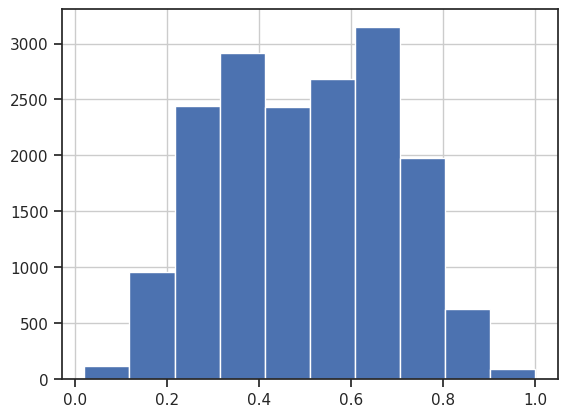

In [77]:
hour_df.temp.hist()

In [67]:
hour_df.groupby(by="hour").agg({
    "registered" : "sum",
    "cnt" : ["max", "min", "mean"]
}).sort_values(by=("cnt", "mean"), ascending=False)

registered  cnt                
            sum  max min        mean
hour                                
17       282640  976  15  461.452055
18       265276  977  23  425.510989
8        245240  839   5  359.011004
16       173914  783  11  311.983562
19       191284  743  11  311.523352
13       132206  760  11  253.661180
12       134696  776   3  253.315934
15       128543  750   7  251.233196
14       120563  750  12  240.949246
20       138172  567  11  226.030220
9        136980  426  14  219.309491
7        146134  596   1  212.064649
11       108034  663  10  208.143054
10        92468  539   8  173.668501
21       104875  584   6  172.314560
22        79412  502   9  131.335165
23        52876  256   2   87.831044
6         52115  213   1   76.044138
0         31755  283   2   53.898072
1         19455  168   1   33.375691
2         12940  132   1   22.869930
5         13249   66   1   19.889819
3          6281   79   1   11.727403
4          3554   28   1    6.352941

**insight:** jumlah pengguna paling banyak adalah jam ke-17, dan jumlah pengguna paling sedikit adalah jam ke-4.

**insight:** dari sini kita dapatkan bahwa pada jam ke-17 adalah waktu yang paling banyak diminati dalam penggunaan sewa sepeda.

In [74]:
temp_weather_grouped = hour_df.groupby(['temp', 'weathersit']).agg({
    'cnt': ['sum', 'max', 'min', 'mean']
}).sort_values(by=('cnt', 'sum'), ascending=False)
print(temp_weather_grouped)

                    cnt                     
                    sum  max min        mean
temp weathersit                             
0.70 1           131777  970   2  261.462302
0.74 1           130877  953   4  319.992665
0.72 1           122026  900   3  289.847981
0.76 1           107917  877   5  356.161716
0.64 1           106098  976   2  228.659483
...                 ...  ...  ..         ...
0.08 3               24   24  24   24.000000
0.14 4               23   23  23   23.000000
0.10 3               21   21  21   21.000000
0.12 3               20   20  20   20.000000
0.02 2                5    3   2    2.500000

[140 rows x 4 columns]


**insight:** kondisi cuaca yang paling banyak penyewa adalah ketika cuacanya clear/cerah dengan temp 0.70 dan 0.74 dengan jumlah penyewa 131777(0.70), dan rata-rata 319.99(0.74).

**insight:** dari sini kita dapatkan kondisi cuaca cerah/clear dengan temp 0.70 dan 0.74 adalah yang paling diminati oleh penyewa sepeda.

##Visualization and Explanatory Analysis

###Pertanyaan 1: Bagaimana pola penggunaan sepeda berbagi berdasarkan waktu (jam, hari, dan musim)?

####Visualisasi Rentals by Season

<ipython-input-64-f424993d76cf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, palette='Set3', ci=None)
<ipython-input-64-f424993d76cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, palette='Set3', ci=None)


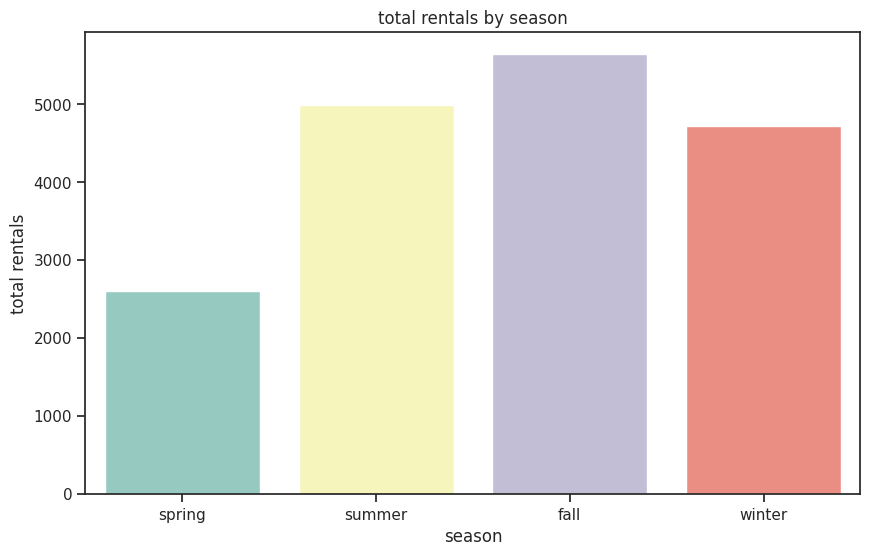

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=day_df, palette='Set3', ci=None)
plt.title('total rentals by season')
plt.xlabel('season')
plt.xticks(ticks=range(4), labels=['spring', 'summer', 'fall', 'winter'])
plt.ylabel('total rentals')
plt.show()

####Visualisasi Rentals by day of the week

<ipython-input-85-7d4a48453d19>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_of_week', y='cnt', data=day_df, palette='viridis', ci=None)
<ipython-input-85-7d4a48453d19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='cnt', data=day_df, palette='viridis', ci=None)


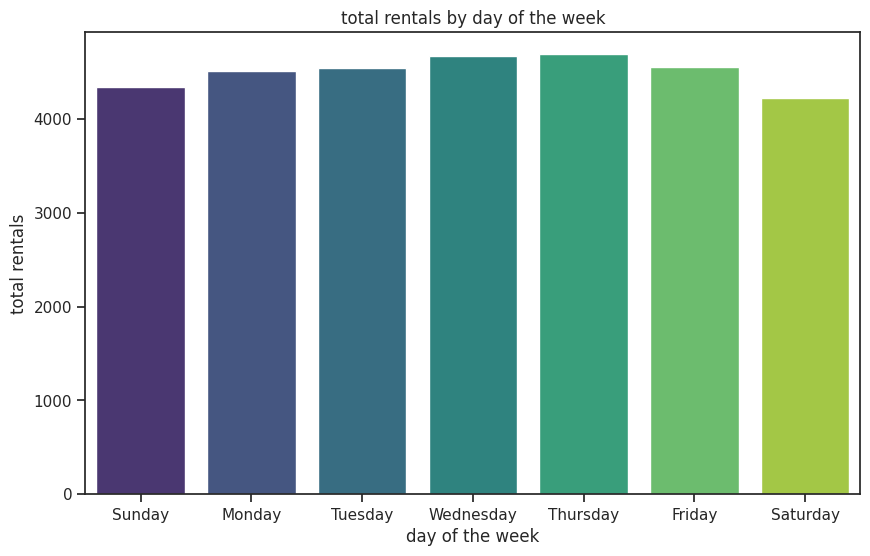

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='cnt', data=day_df, palette='viridis', ci=None)
plt.title('total rentals by day of the week')
plt.xlabel('day of the week')
plt.xticks(ticks=range(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.ylabel('total rentals')
plt.show()

####Visualisasi rentals by hour of the day

<ipython-input-86-6ba4d706bdac>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='cnt', data=hour_df, hue='season', ci=None)


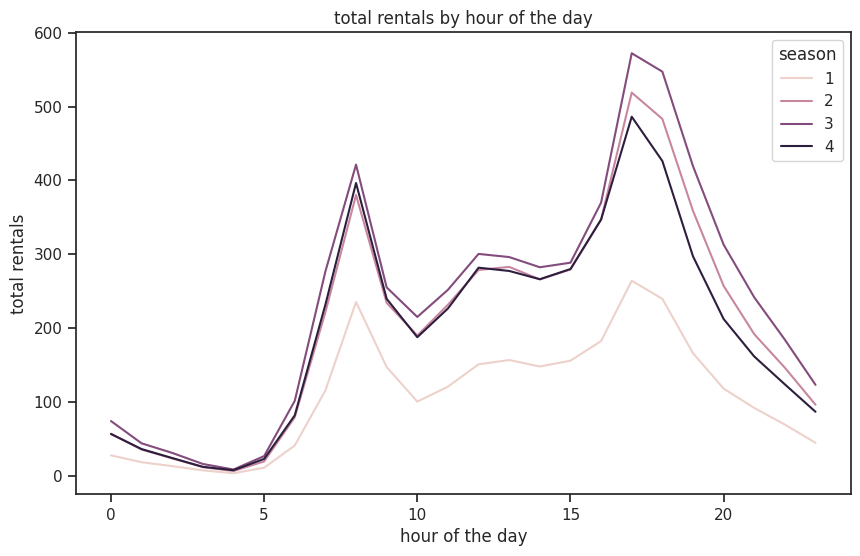

In [86]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='cnt', data=hour_df, hue='season', ci=None)
plt.title('total rentals by hour of the day')
plt.xlabel('hour of the day')
plt.ylabel('total rentals')
plt.legend(title='season')
plt.show()

###visualisasi distribusi pengguna berdasarkan hari kerja dan weekend

<ipython-input-87-04d4c75b34ce>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=day_df, palette='Set2', ci=None)
<ipython-input-87-04d4c75b34ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=day_df, palette='Set2', ci=None)


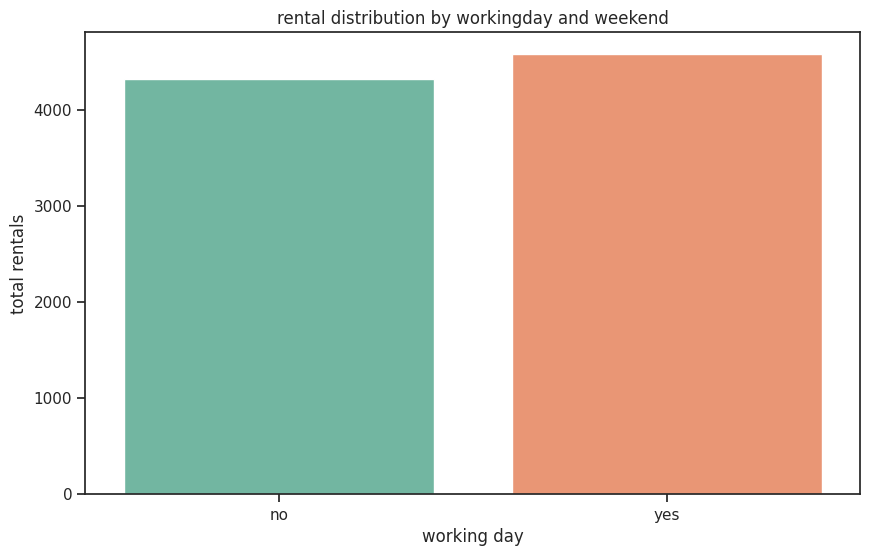

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=day_df, palette='Set2', ci=None)
plt.title('rental distribution by workingday and weekend')
plt.xlabel('working day')
plt.xticks(ticks=[0, 1], labels=['no', 'yes'])
plt.ylabel('total rentals')
plt.show()

**insight:** dari 4 gambar visualisasi rental sepeda diatas yang berdasarkan season/musim, day/hari, hour/jam, dan hari kerja/workingday. kita mendapatkan bahwa minat pada musim fall/musim ke-3 adalah yang paling diminati penyewa sepeda, lalu hari yang paling banyak penyewa sepeda datangi adalah hari kamis dan rabu, lalu jam paling ramai penyewa adalah jam ke-17, dan perbandingan hari kerja dan libur lebih banyak penyewa pada hari kerja seperti hari kamis dan rabu.

###Pertanyaan 2: Faktor cuaca apa saja yang paling mempengaruhi jumlah penyewaan sepeda?

####Visualisasi efek temperatur pada rental sepeda

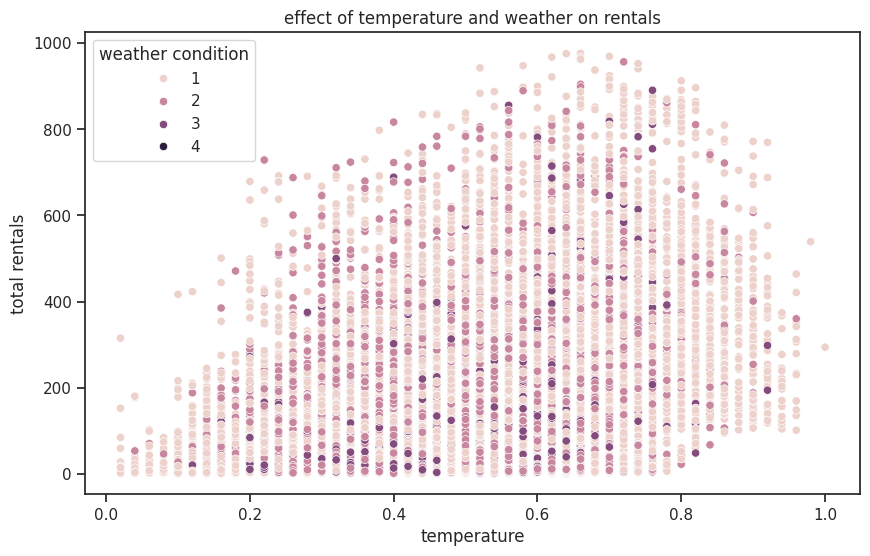

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df, hue='weathersit')
plt.title('effect of temperature and weather on rentals')
plt.xlabel('temperature')
plt.ylabel('total rentals')
plt.legend(title='weather condition')
plt.show()

####visualisasi distribusi pengguna berdasarkan weather condition




<ipython-input-89-f2f9bb49cf4b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=hour_df, ci=None, palette='rainbow')
<ipython-input-89-f2f9bb49cf4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=hour_df, ci=None, palette='rainbow')


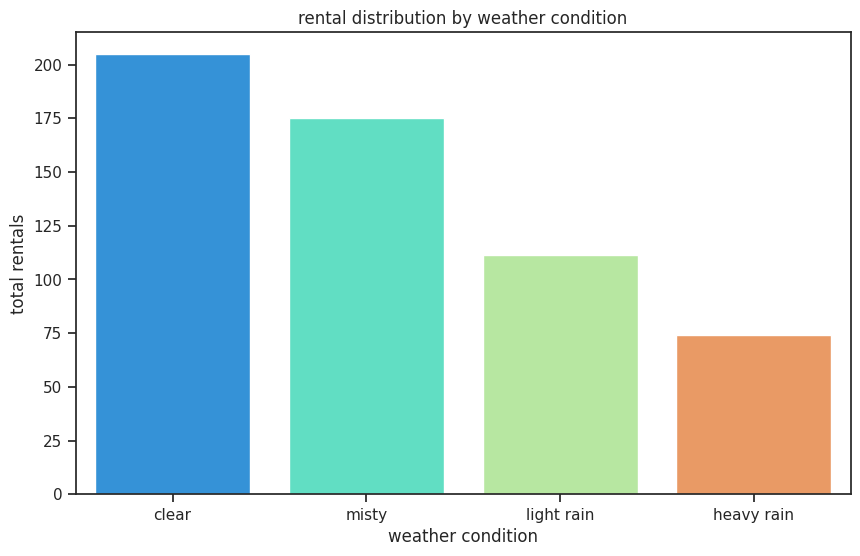

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=hour_df, ci=None, palette='rainbow')
plt.title('rental distribution by weather condition')
plt.xlabel('weather condition')
plt.xticks(ticks=range(4), labels=['clear', 'misty', 'light rain', 'heavy rain'])
plt.ylabel('total rentals')
plt.show()

**insight:** dari 2 gambar visualisasi rental sepeda berdasarkan faktor cuaca dan temperatur pada penyewaan sepeda adalah bahwa penyewa sepeda akan banyak yang menyewa ketika cuaca nya cerah/clear dengan temperatur yang berangin/hangat dengan nilai temperatur 0.70 dan 0.74, lalu cuaca yang kurang diminati adalah cuaca yang hujan lebat/heavy rain ya karena siapa juga yang mau naik sepeda saat hujan lebat dengan temperatur 0.02 yang mana sangat dingin.

##Analisis Lanjutan

###Regresi Linier untuk mengetahui pengaruh fitur cuaca terhadap pengguna sepeda

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
X = hour_df[['temp', 'hum', 'windspeed', 'season', 'weathersit']]
y = hour_df['cnt']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nRegression coefficients:\n", coefficients)


Regression coefficients:
             Coefficient
temp         323.522461
hum         -307.248460
windspeed     33.599582
season        21.551882
weathersit     8.186042


**insight 1:**
1. temp dengan Koefisien: 323.52, yang berarti Setiap peningkatan satu unit pada temperature akan meningkatkan jumlah penyewaan sepeda sebesar 323.52, dengan asumsi faktor lain tetap konstan. Ini menunjukkan bahwa suhu yang lebih hangat berhubungan dengan lebih banyaknya penyewaan sepeda.
2. hum dengan Koefisien: -307.25, yang berarti Setiap peningkatan satu unit pada humidity akan mengurangi jumlah penyewaan sepeda sebesar 307.25, dengan asumsi faktor lain tetap konstan. Ini menunjukkan bahwa semakin tinggi kelembaban, semakin rendah jumlah penyewaan sepeda, mungkin karena cuaca yang lebih lembab cenderung tidak nyaman untuk bersepeda.
3. windspeed dengan Koefisien: 33.60, Setiap peningkatan satu unit pada windspeed akan meningkatkan jumlah penyewaan sepeda sebesar 33.60. Meskipun pengaruhnya tidak sebesar temperature, kecepatan angin yang lebih tinggi sedikit berhubungan dengan peningkatan penyewaan sepeda.
4. season dengan Koefisien: 21.55, Koefisien ini menunjukkan bahwa ada peningkatan sekitar 21.55 unit penyewaan sepeda untuk perubahan di antara musim, dengan faktor lain tetap konstan. Artinya, musim memang mempengaruhi jumlah penyewaan, tapi pengaruhnya lebih kecil dibandingkan suhu atau kelembaban.
5. weathersit dengan Koefisien: 8.19, Perubahan pada kondisi cuaca berhubungan dengan perubahan yang relatif kecil dalam jumlah penyewaan sepeda, dengan peningkatan 8.19 unit sewa untuk setiap perubahan kondisi cuaca (misalnya dari cuaca cerah ke sedikit mendung). Ini menunjukkan bahwa cuaca memiliki pengaruh kecil terhadap jumlah sewa.

**insight 2:**
Temperature adalah faktor yang paling signifikan dan berpengaruh positif terhadap jumlah penyewaan sepeda. Semakin hangat cuacanya, semakin banyak sepeda yang disewa.
Humidity memiliki pengaruh signifikan yang negatif terhadap jumlah penyewaan. Ini berarti kondisi cuaca yang lembab cenderung menurunkan jumlah sewa sepeda.
Faktor lain seperti windspeed, season, dan weathersit juga berpengaruh, namun lebih kecil dibandingkan temperature dan humidity.

#Conclusion



- **Pertanyaan 1:** pola waktu(musim, hari, jam) itu mempengaruhi jumlah penyewa sepeda yang datang dengan musim, hari, dan jam tertentu. misalnya musim fall, adalah yang paling sering didatangi oleh para penyewa sepeda suasana yang hangat, lalu hari yang paling sering didatangi penyewa adalah hari-hari kerja atau workday pada hari rabu dan kamis, dan di jam ke-17.
- **Pertanyaan 2:** faktor cuaca juga mempengaruhi banyaknya penyewa sepeda dikarenakan jika cuaca yang tidak mendukung maka penyewa akan berkurang sebaliknya jika cuaca mendukung maka penyewa akan berdatangan. misal, cuaca cerah dengan temparatur yang hangat dan berangin akan lebih banyak didatangi penyewa sepeda.

In [90]:
day_df.to_csv("day.csv", index=False)
hour_df.to_csv("hour.csv", index=False)